In [1]:
# Source of data: https://wonder.cdc.gov/controller/datarequest/D153;jsessionid=A591795EE943C0BBA572E5A6D51D45F7

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# Read in datasets and clean data

cancer_rates = pd.read_csv("Cancer Rates.csv")
cancer_rates_by_race = pd.read_csv("Cancer Rates Race.csv")

for idx, row in cancer_rates.iterrows():
    # drop rows with unreliable data
    if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
        cancer_rates = cancer_rates.drop(idx)

# convert Mortality-Incidence Age-Adjusted Rate Ratio column to floats
cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"] = cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')
cancer_rates["Year"] = cancer_rates["Year"].astype('int')

In [3]:
# Get list of leading cancer sites and list of years

leading_cancer_sites = []
for idx, row in cancer_rates.iterrows():
    if row["Leading Cancer Sites"] not in leading_cancer_sites:
        leading_cancer_sites.append(row["Leading Cancer Sites"])

years = []
for year in list(cancer_rates["Year"]):
    if year not in years:
        years.append(year)

In [4]:
def sum_statistics_by_site_and_year(df, site, year):
    """ Gets summary statistics for a given cancer site and year
    
    param df: the main dataframe of cancer data
    param site: the leading cancer site to get statistics for
    param year: the year to get statistics for
    return: a dict, where keys = the columns of the DataFrame, and values = the mean of all the rows in each column
    """
    #df = df[df["Leading Cancer Sites"] == site] # filter to only include the cancer site of interest
    df = df[df["Year"] == year] # filter to only include the year of interest
    
    return {"Mortality-Incidence Age-Adjusted Rate Ratio": df.mean()["Mortality-Incidence Age-Adjusted Rate Ratio"]*100,
            "Mortality Age-Adjusted Rate (per 100,000)": df.mean()["Mortality Age-Adjusted Rate (per 100,000)"],
           "Incidence Age-Adjusted Rate (per 100,000)": df.mean()["Incidence Age-Adjusted Rate (per 100,000)"]}

In [5]:
def get_ax():
    """ Creates a matplotlib axis to plot on
    """
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

def plot_year(category):
    d = {}
    for year in list(cancer_rates["Year"]):
        d.update({str(year):sum_statistics_by_site_and_year(cancer_rates, category, year)})
    df = pd.DataFrame(d).T
    ax = get_ax()
    df.plot(ax=ax)

In [7]:
# Calculate linear regressions

def plot_regressions(df, x, y, ax, color):
    df = df.dropna()
    r = LinearRegression()
    r.fit(df[x].values.reshape(-1,1),
      df[y].values.reshape(-1,1))
    slope = (r.coef_)[0][0]
    intercept = (r.intercept_)[0]
    y0 = (ax.get_xlim()[0])*slope + intercept
    y1 = (ax.get_xlim()[1])*slope + intercept
    ax.plot((ax.get_xlim()[0], ax.get_xlim()[1]), (y0, y1), c=color, dashes=[5,2,1,2])

In [22]:
# Load and clean up funding data

funding_data = pd.read_csv("Funding Data.csv")

for index, row in funding_data.iterrows():
    for col in funding_data.columns:
        if funding_data.at[index, col] == "*" or funding_data.at[index, col] == "**" or funding_data.at[index, col] == "---":
            funding_data.at[index, col] = np.nan

for col in funding_data.columns[1:]:
    funding_data[col] = funding_data[col].astype("float")


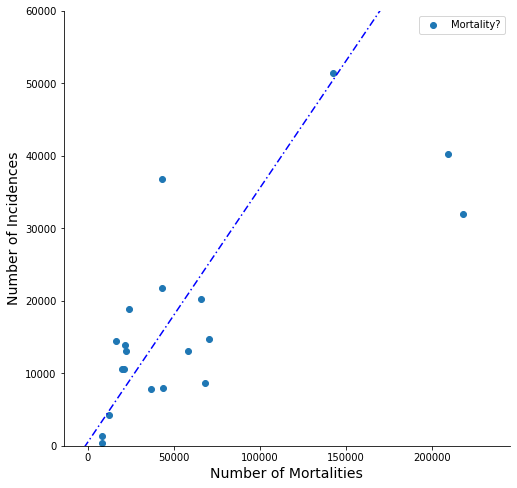

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(funding_data["Incidence"], funding_data["Mort."], label="Mortality?")
ax.set_xlabel("Number of Mortalities", fontsize=14)
ax.set_ylabel("Number of Incidences", fontsize=14)
ax.set_ylim([0,60000])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plot_regressions(funding_data, "Incidence", "Mort.", ax=ax, color="blue")

plt.legend(loc="upper right")
plt.show("off")

In [14]:
funding_data

,Unnamed: 0,Incidence,Mort.,US Gov't YLL (thousands),WHO DALY (thousands),Medicare Spend$ (millions),National spend $ (billions),Lost prod. (billions),NCI Funding (millions),AYLL,YLLPI
0,Bladder,70530.0,14680.0,154.4,128.7,1023.0,3.466,1.977,22.6,10.52,2.19
1,"Brain, ONS",22020.0,13140.0,290.8,NaN,293.0,3.715,5.851,193.1,22.13,13.21
2,Breast,209060.0,40230.0,761.3,612.5,1375.0,13.886,10.879,631.2,18.92,3.64
3,Cervix,12200.0,4210.0,104.7,114.1,73.0,1.425,1.808,76.5,24.87,8.58
4,Colon/rectum,142570.0,51370.0,764.6,542.1,3101.0,12.155,12.802,270.4,14.88,5.36
5,Esophogus,16640.0,14500.0,214.2,122.0,386.0,1.071,NaN,30.5,14.77,12.87
6,Hogkin lymph.,8490.0,1320.0,29.8,288.7,1350.0,10.168,0.829,14.6,22.58,3.51
7,Kidney,58240.0,13040.0,195.7,NaN,685.0,3.058,3.633,90.0,15.01,3.36
8,Leukemia,43050.0,21840.0,355.2,210.5,695.0,4.507,5.880,295.8,16.26,8.25
9,Liver,24120.0,18910.0,292.2,137.8,278.0,NaN,4.638,72.6,15.45,12.11


In [16]:
biglist = []
totalfundinglist = []
for i in range(len(funding_data)):
    ilist = []
    ncifunding = (int(str(funding_data.iloc[i][8]).replace(".","")))/10000
    funding = []
    if np.isnan(funding_data.iloc[i][6]) == False:
        money = int(str(funding_data.iloc[i][6]).replace(".","")+"000000")
        funding.append(money)
    if np.isnan(funding_data.iloc[i][5]) == False:
        money = int(str(funding_data.iloc[i][5]).replace(".","")+"00000")
        funding.append(money)
    if np.isnan(funding_data.iloc[i][8]) == False:
        money = int(str(funding_data.iloc[i][8]).replace(".","")+"00000")
        funding.append(money)
    totalfunding = (sum(funding))/1000000000
    totalfundinglist.append(totalfunding)
    Incidences = funding_data.iloc[i][1]
    Mortalities = funding_data.iloc[i][2]
    rate = Mortalities/Incidences
    ilist.append(funding_data.iloc[i][0])  
    ilist.append(totalfunding) 
    ilist.append(rate)
    ilist.append(Incidences)
    ilist.append(Mortalities)
    biglist.append(ilist)

    
fundingmortalitydata = pd.DataFrame(biglist)

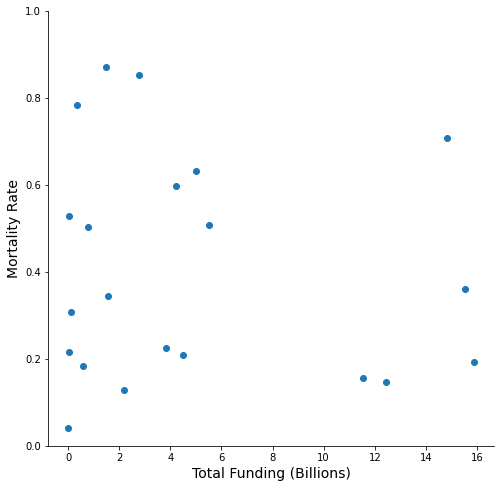

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(fundingmortalitydata[1], fundingmortalitydata[2])
ax.set_ylabel("Mortality Rate", fontsize=14)
ax.set_xlabel("Total Funding (Billions)", fontsize=14)
ax.set_ylim([0,1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show("off")

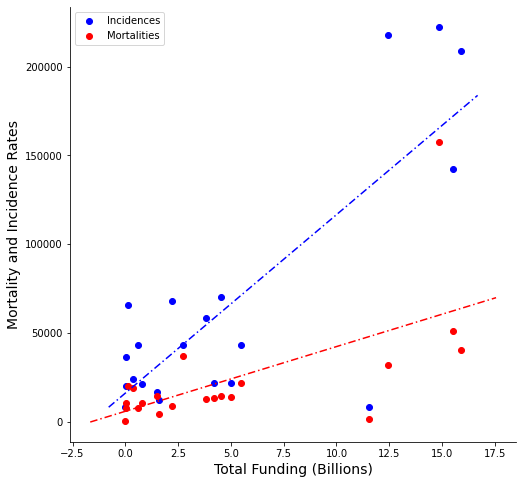

In [21]:
#mortality and incidence rate vs funding

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(fundingmortalitydata[1], fundingmortalitydata[3], c="blue", label="Incidences")
ax.scatter(fundingmortalitydata[1], fundingmortalitydata[4], c="red", label="Mortalities")

ax.set_ylabel("Mortality and Incidence Rates", fontsize=14)
ax.set_xlabel("Total Funding (Billions)", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plot_regressions(fundingmortalitydata, 1, 3, ax=ax, color="blue")
plot_regressions(fundingmortalitydata, 1, 4, ax=ax, color="red")


plt.legend(loc="upper left")
plt.show("off")

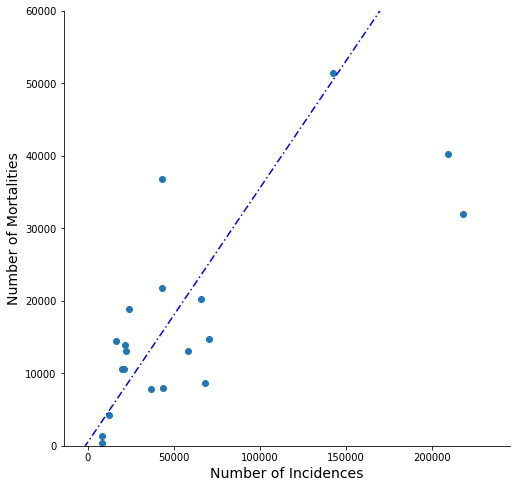

In [19]:
#mortality over incidence

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(funding_data["Incidence"], funding_data["Mort."])
ax.set_ylabel("Number of Mortalities", fontsize=14)
ax.set_xlabel("Number of Incidences", fontsize=14)
ax.set_ylim([0,60000])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plot_regressions(funding_data, "Incidence", "Mort.", ax=ax, color="blue")

plt.show("off")